<a href="https://colab.research.google.com/github/thanhcdt1820/Kiemtragiuaky/blob/main/Food_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Thanh/food.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(5500, 150, 150, 3)
(5500, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape

(4400, 150, 150, 3)

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_80 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_82 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                 

In [ ]:
aug = ImageDataGenerator(rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64))

<ipython-input-29-d88845760a12>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64))


Epoch 1/25
69/69 [==============================] - 40s 507ms/step - loss: 2.2568 - accuracy: 0.1352 - val_loss: 2.3682 - val_accuracy: 0.1245
Epoch 2/25
69/69 [==============================] - 39s 566ms/step - loss: 2.1647 - accuracy: 0.1870 - val_loss: 2.1132 - val_accuracy: 0.2100
Epoch 3/25
69/69 [==============================] - 39s 564ms/step - loss: 2.0837 - accuracy: 0.2332 - val_loss: 2.0803 - val_accuracy: 0.2227
Epoch 4/25
69/69 [==============================] - 34s 491ms/step - loss: 1.9910 - accuracy: 0.2830 - val_loss: 1.9423 - val_accuracy: 0.3091
Epoch 5/25
69/69 [==============================] - 36s 515ms/step - loss: 1.8498 - accuracy: 0.3384 - val_loss: 1.9074 - val_accuracy: 0.3373
Epoch 6/25
69/69 [==============================] - 35s 502ms/step - loss: 1.7513 - accuracy: 0.3836 - val_loss: 1.7183 - val_accuracy: 0.4073
Epoch 7/25
69/69 [==============================] - 40s 573ms/step - loss: 1.6460 - accuracy: 0.4395 - val_loss: 1.7272 - val_accuracy: 0.4091

In [ ]:
model.save('/content/drive/MyDrive/Food10/Food_10.h5')

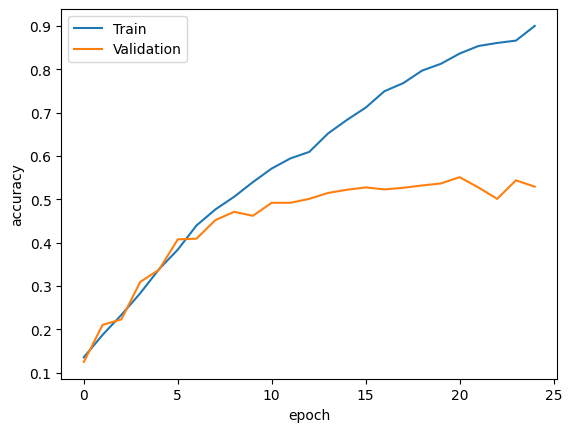

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

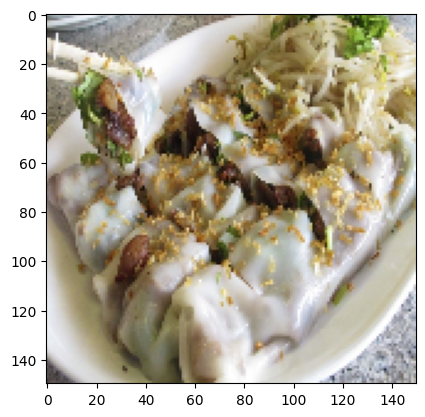

1/1 [==============================] - 0s 32ms/step
[[8.5177100e-01 1.1402238e-02 4.0006391e-03 3.5862252e-02 1.4979157e-04
  6.4497955e-02 1.4246248e-02 6.1519113e-03 8.3728526e-03 3.5450559e-03]]
This picture is:  Banh cuon [8.5177100e-01 1.1402238e-02 4.0006391e-03 3.5862252e-02 1.4979157e-04
 6.4497955e-02 1.4246248e-02 6.1519113e-03 8.3728526e-03 3.5450559e-03]
0.851771


In [ ]:
class_name = ['Banh cuon','Banh mi','Banh xeo','Bun bo Hue','Bun dau man tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']
image = X[500]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[500]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

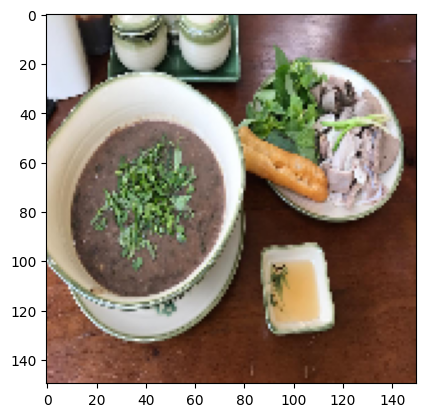

1/1 [==============================] - 0s 21ms/step
[[9.1701030e-04 4.4884706e-05 2.0654006e-03 4.1549294e-03 1.9265527e-03
  9.4573241e-01 7.6425538e-05 1.2152306e-04 4.4624481e-02 3.3633460e-04]]
This picture is:  Chao long [9.1701030e-04 4.4884706e-05 2.0654006e-03 4.1549294e-03 1.9265527e-03
 9.4573241e-01 7.6425538e-05 1.2152306e-04 4.4624481e-02 3.3633460e-04]
0.9457324


In [ ]:
class_name = ['Banh cuon','Banh mi','Banh xeo','Bun bo Hue','Bun dau man tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']
image = X[25]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[25]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

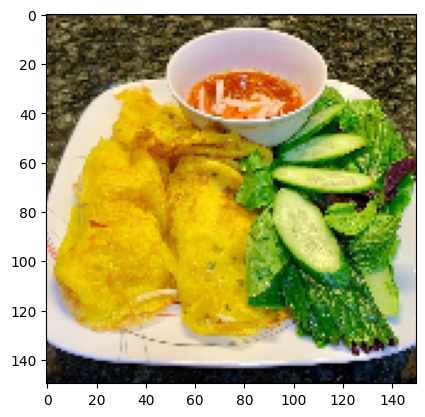

1/1 [==============================] - 0s 30ms/step
[[2.0568253e-17 1.0877756e-19 1.0000000e+00 4.9728781e-25 3.7786182e-20
  3.1349365e-22 3.4647278e-22 4.2049163e-19 3.1863732e-09 1.0680269e-19]]
This picture is:  Banh xeo [2.0568253e-17 1.0877756e-19 1.0000000e+00 4.9728781e-25 3.7786182e-20
 3.1349365e-22 3.4647278e-22 4.2049163e-19 3.1863732e-09 1.0680269e-19]
1.0


In [ ]:
class_name = ['Banh cuon','Banh mi','Banh xeo','Bun bo Hue','Bun dau man tom','Chao long','Com tam','Goi cuon','Mi quang','Pho']
image = X[429]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[429]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))